# Import Libraries

In [65]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# Functions

In [66]:
def sensitivity(TP, FN):
    sensitivity = TP/(TP+FN)
    return sensitivity

In [67]:
def precision(TP, FP):
    precision = TP/(TP+FP)
    return precision

In [68]:
def npv(TN, FN):
    npv = TN/(TN+FN)
    return npv

In [69]:
def specificity(TN, FP):
    specificity = TN/(TN+FP)
    return specificity

In [70]:
def accuracy(TP, TN, FP, FN):
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    return accuracy

# Without Data Cleaning - Oil Spill

In [71]:
# Read Data
data = pd.read_csv('oil-spill.csv', header=None)

# Membagi Data X dan y
X, y = data.values[:,:-1], data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Melatih Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Menghitung Prediksi
y_pred = model.predict(X_test)

# Menghitung Metrik Kinerja secara manual
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Sensitivity: {sensitivity(tp, fn):.3f}")
print(f"Precision: {precision(tp, fp):.3f}")
print(f"Negative Predictive Value: {npv(tn, fn):.3f}")
print(f"Specificity: {specificity(tn, fp):.3f}")
print(f"Accuracy: {accuracy(tp, tn, fp, fn):.3f}")

Sensitivity: 0.083
Precision: 0.250
Negative Predictive Value: 0.940
Specificity: 0.983
Accuracy: 0.926


c:\Users\cleve\.conda\envs\data-preprocessing\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Identify Columns That Contain a Single Value - Oil Spill

### Delete Columns That Contain a Single Value

In [72]:
# Read Data
data = pd.read_csv('oil-spill.csv', header=None)

# Get number of unique values for each column
counts = data.nunique()

# Record columns to be deleted
to_del = [i for i,v in enumerate(counts) if v==1]

# Drop useless columns
data.drop(to_del, axis=1, inplace=True)

# Membagi Data X dan y
X, y = data.values[:,:-1], data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Melatih Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Menghitung Prediksi
y_pred = model.predict(X_test)

# Menghitung Metrik Kinerja secara manual
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Sensitivity: {sensitivity(tp, fn):.3f}")
print(f"Precision: {precision(tp, fp):.3f}")
print(f"Negative Predictive Value: {npv(tn, fn):.3f}")
print(f"Specificity: {specificity(tn, fp):.3f}")
print(f"Accuracy: {accuracy(tp, tn, fp, fn):.3f}")

Sensitivity: 0.083
Precision: 0.167
Negative Predictive Value: 0.940
Specificity: 0.972
Accuracy: 0.915


c:\Users\cleve\.conda\envs\data-preprocessing\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Remove Columns That Have Very Few Values - Oill Spill

### Delete columns with low values

In [73]:
# delete columns where number of unique values is less than 1% of the rows
# Load the dataset
data = pd.read_csv('oil-spill.csv', header=None)
print(data.shape)

# Split data into X and y
X, y = data.values[:, :-1], data.values[:, -1]

# Convert X into a DataFrame
X = pd.DataFrame(X)

# Get number of unique values for each column of X
counts = X.nunique()

# Record columns to delete
to_del = [i for i, v in enumerate(counts) if (float(v) / X.shape[0] * 100) < 1]
print(to_del)

# Drop useless columns from X
X = X.drop(to_del, axis=1)
print(X.shape)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Sensitivity: {sensitivity(tp, fn):.3f}")
print(f"Precision: {precision(tp, fp):.3f}")
print(f"Negative Predictive Value: {npv(tn, fn):.3f}")
print(f"Specificity: {specificity(tn, fp):.3f}")
print(f"Accuracy: {accuracy(tp, tn, fp, fn):.3f}")

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45]
(937, 39)
Sensitivity: 0.083
Precision: 0.125
Negative Predictive Value: 0.939
Specificity: 0.960
Accuracy: 0.904


c:\Users\cleve\.conda\envs\data-preprocessing\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Remove Columns That Have A Low Variance - Oil Spill

### Reviewing the effect of different variance thresholds on the number of features in the transformed dataset.

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


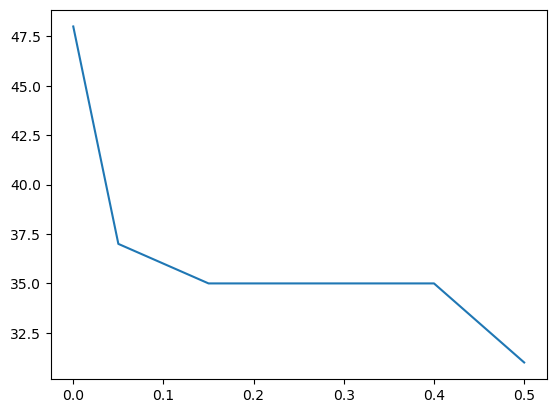

In [74]:
# explore the effect of the variance thresholds on the number of selected features
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

### Remove columns with low variance

In [75]:
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
# define the transform
transform = VarianceThreshold(threshold=0.15)
# transform the input data
X_sel = transform.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=1)

# Melatih Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Menghitung Prediksi
y_pred = model.predict(X_test)

# Menghitung Metrik Kinerja secara manual
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Sensitivity: {sensitivity(tp, fn):.3f}")
print(f"Precision: {precision(tp, fp):.3f}")
print(f"Negative Predictive Value: {npv(tn, fn):.3f}")
print(f"Specificity: {specificity(tn, fp):.3f}")
print(f"Accuracy: {accuracy(tp, tn, fp, fn):.3f}")

Sensitivity: 0.083
Precision: 0.200
Negative Predictive Value: 0.940
Specificity: 0.977
Accuracy: 0.920


c:\Users\cleve\.conda\envs\data-preprocessing\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Without Data Cleaning - Iris

In [76]:
# Read Data
data = pd.read_csv('iris.csv', header=None)
# Membagi Data X dan y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Melatih Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Menghitung Prediksi
y_pred = model.predict(X_test)

# Menghitung Metrik Kinerja secara manual
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate True Negatives (TN)
tn = conf_matrix[2][2]

# Calculate False Positives (FP)
fp = conf_matrix[0][1] + conf_matrix[1][2]

# Calculate False Negatives (FN)
fn = conf_matrix[1][0] + conf_matrix[2][1]

# Calculate True Positives (TP)
tp = conf_matrix[1][1]

print(f"Sensitivity: {sensitivity(tp, fn):.3f}")
print(f"Precision: {precision(tp, fp):.3f}")
print(f"Negative Predictive Value: {npv(tn, fn):.3f}")
print(f"Specificity: {specificity(tn, fp):.3f}")
print(f"Accuracy: {accuracy(tp, tn, fp, fn):.3f}")

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Sensitivity: 1.000
Precision: 0.923
Negative Predictive Value: 1.000
Specificity: 0.857
Accuracy: 0.947


# Remove data with duplicated values - Iris

In [77]:
# Read Data
data = pd.read_csv('iris.csv', header=None)

# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(data[dups])
# delete duplicate rows
data.drop_duplicates(inplace=True)
print(data.shape)

# Membagi Data X dan y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Melatih Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Menghitung Prediksi
y_pred = model.predict(X_test)

# Menghitung Metrik Kinerja secara manual
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate True Negatives (TN)
tn = conf_matrix[2][2]

# Calculate False Positives (FP)
fp = conf_matrix[0][1] + conf_matrix[1][2]

# Calculate False Negatives (FN)
fn = conf_matrix[1][0] + conf_matrix[2][1]

# Calculate True Positives (TP)
tp = conf_matrix[1][1]

print(f"Sensitivity: {sensitivity(tp, fn):.3f}")
print(f"Precision: {precision(tp, fp):.3f}")
print(f"Negative Predictive Value: {npv(tn, fn):.3f}")
print(f"Specificity: {specificity(tn, fp):.3f}")
print(f"Accuracy: {accuracy(tp, tn, fp, fn):.3f}")



True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica
(147, 5)
[[ 9  0  0]
 [ 0 12  1]
 [ 0  1  7]]
Sensitivity: 0.923
Precision: 0.923
Negative Predictive Value: 0.875
Specificity: 0.875
Accuracy: 0.905


c:\Users\cleve\.conda\envs\data-preprocessing\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ringkasan

1. **Impor Modul yang Diperlukan:**
   - Pandas untuk mengelola data tabular.
   - `train_test_split` dari `sklearn.model_selection` untuk membagi data menjadi data pelatihan dan pengujian.
   - `LogisticRegression` dari `sklearn.linear_model` untuk melatih model Regresi Logistik.
   - `confusion_matrix` dari `sklearn.metrics` untuk menghitung confusion matrix.
   - `VarianceThreshold` dari `sklearn.feature_selection` untuk menghapus fitur dengan varian rendah.
   - `pyplot` dari `matplotlib` untuk membuat plot.

2. **Mengimpor Dataset:**
   - Membaca dataset 'oil-spill.csv' ke dalam objek DataFrame 'data'.

3. **Membagi Data:**
   - Membagi data menjadi fitur (X) dan target (y), lalu membagi mereka menjadi data pelatihan dan pengujian dengan rasio 80:20.

4. **Melatih Model Regresi Logistik:**
   - Menggunakan model Regresi Logistik untuk melatih data pelatihan.

5. **Menggunakan Model yang Dilatih:**
   - Menggunakan model yang dilatih untuk membuat prediksi pada data pengujian.

6. **Menghitung Metrik Kinerja:**
   - Menghitung metrik kinerja seperti Sensitivity, Precision, Negative Predictive Value, Specificity, dan Accuracy dengan menggunakan confusion matrix yang dihasilkan.

7. **Menghapus Fitur dengan Varian Rendah:**
   - Menghapus fitur dengan varian rendah (fitur dengan jumlah unik kurang dari 1% dari jumlah baris) dan mengulangi proses pelatihan dan pengujian model.

8. **Menggunakan Variasi Ambang Batas:**
   - Menggunakan variasi ambang batas untuk mengukur dampak ambang batas varian pada jumlah fitur yang dipilih.

9. **Melatih Model pada Dataset 'iris.csv':**
   - Membaca dataset 'iris.csv', membagi data menjadi data pelatihan dan pengujian, dan melatih model Regresi Logistik.

10. **Menghitung Metrik Kinerja pada Dataset 'iris.csv':**
    - Menghitung metrik kinerja model pada data 'iris.csv'.

11. **Mengecek dan Menghapus Duplikat:**
    - Mengecek dan menghapus duplikat baris dalam dataset 'iris.csv', lalu mengulangi proses pelatihan dan pengujian model.


# Kesimpulan

Secara kesimpulan, tugas ini telah menyoroti langkah-langkah penting dalam membersihkan data yang sangat diperlukan untuk setiap dataset. Ini termasuk penghapusan kolom dengan hanya satu nilai, pertimbangan terhadap kolom dengan sedikit nilai unik, dan identifikasi serta penghapusan baris duplikat. Dengan menerapkan praktik-praktik ini, kita dapat memastikan kualitas dan keandalan dataset kita untuk analisis dan pemodelan lebih lanjut.